In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import joblib
import pandas as pd
import numpy as np
import random

In [2]:
# Load the joblib files
x = joblib.load('/content/drive/MyDrive/comsnets data csi joint/X.joblib')
data_loc_y = joblib.load('/content/drive/MyDrive/comsnets data csi joint/data_loc_Y.joblib')
data_har_y = joblib.load('/content/drive/MyDrive/comsnets data csi joint/data_har_Y.joblib')
phase = joblib.load('/content/drive/MyDrive/comsnets data csi joint/PHASE.joblib')

In [3]:
x.shape, data_loc_y.shape, data_har_y.shape, phase.shape

((240, 52, 990), (240,), (240,), (240, 52, 990))

In [4]:
data_loc_y[:]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  9

In [5]:
data_har_y[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [4]:
# Transpose x to shape (240, 990, 52)
x_transposed = x.transpose(0, 2, 1)/15.0
phase_transposed = phase.transpose(0, 2, 1)
x_transposed.shape, phase_transposed.shape

((240, 990, 52), (240, 990, 52))

In [5]:
def lowPassFilter(inputSignalArray):
    filteredOutput = np.zeros(inputSignalArray.shape[0])
    filteredOutput[0] = inputSignalArray[0]
    #print(filteredOutput)
    for i in range(1, inputSignalArray.shape[0]):
        newVal = 0.97*filteredOutput[i-1] + .03*inputSignalArray[i]
        filteredOutput[i] = newVal
    return filteredOutput

In [6]:
csi_magnitude_filtered = np.apply_along_axis(lowPassFilter, 1, x_transposed)

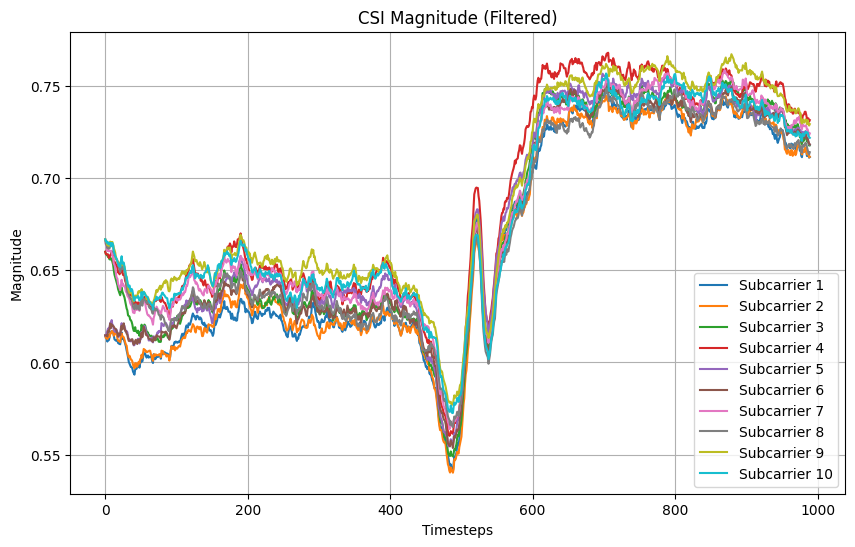

In [7]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = csi_magnitude_filtered[0, :, :10]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Assuming x_train and x_test are numpy arrays with shape (num_samples, num_timesteps, num_subcarriers=90)

# Compute variances across subcarriers for x_train and x_test
variances_amp = np.var(x_transposed, axis=(0, 1))  # Compute variance across all samples and time steps (shape: num_subcarriers)
variances_phase = np.var(phase_transposed, axis=(0, 1))    # Compute variance across all samples and time steps (shape: num_subcarriers)

# Get indices of top three subcarriers with the highest variances
top_subcarrier_indices_amp = np.argsort(variances_amp)
top_subcarrier_indices_phase = np.argsort(variances_phase)

top_subcarrier_indices_amp, top_subcarrier_indices_phase

(array([34, 50, 38, 40, 36, 32, 42, 51, 30, 39, 41, 46, 44, 37, 43, 31, 33,
        29, 28, 48, 49, 35, 45, 47, 26, 27, 25, 24, 23, 22, 21, 20, 19, 18,
        17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  2,  1,  0,
         3]),
 array([46, 50, 51, 48, 49, 43, 44, 39, 42, 31, 28, 45, 47, 21, 19, 38, 40,
        41, 32,  8, 33, 27, 30, 34, 24, 23,  5, 37, 26, 20,  9, 29, 18,  6,
         1,  7, 16, 25, 11, 22, 36,  0, 35, 15, 13, 10, 12, 14, 17,  4,  2,
         3]))

In [11]:
# 3 subcarrier
#csi_amp_3 = np.array(x_transposed)[:, :,[34, 50, 38]]
csi_phase_3 = np.array(phase_transposed)[:,:,[34, 50, 38]]

In [8]:
phase_transposed.shape

(240, 990, 52)

In [9]:
combined = csi_magnitude_filtered[:, :, :30]#np.concatenate((csi_magnitude_filtered[:, :, :3], phase_transposed[:,:,:3]), axis=-1)#csi_magnitude_filtered[:, :, :6]#np.concatenate((csi_amp_3, csi_phase_3), axis=-1)

In [10]:
np.shape(combined)

(240, 990, 30)

In [15]:
np.array(data_har_y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [12]:
# Assuming data_har_y is the same as the provided array in the prompt

unique_labels, counts = np.unique(data_har_y, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [60 60 60 60]


In [11]:
labels = np.array(data_har_y)

In [15]:
np.max(combined)

1.2292725943057183

In [12]:
temp = list(zip(combined, labels))
random.shuffle(temp)
combined, labels = zip(*temp)
combined, labels = list(combined), list(labels)

In [13]:
from sklearn.utils import shuffle
import tensorflow as tf

# Shuffle the data and labels together
combined_shuffled, labels_shuffled = shuffle(combined, labels, random_state=42)

# Split the data and labels
x_train = tf.constant(combined_shuffled[:150])
x_val = tf.constant(combined_shuffled[150:170])
x_test = tf.constant(combined_shuffled[170:240])

y_train = tf.constant(labels_shuffled[:150])
y_val = tf.constant(labels_shuffled[150:170])
y_test = tf.constant(labels_shuffled[170:240])

In [14]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (150, 990, 30)
x_val shape: (20, 990, 30)
x_test shape: (70, 990, 30)
y_train shape: (150,)
y_val shape: (20,)
y_test shape: (70,)


## Reshaping 1d to 2d data

In [15]:
# Reshape the data to add an extra dimension for the CNN
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (num_samples, 200, 6, 1)
x_val = np.expand_dims(x_val, axis=-1)      # Shape: (num_samples, 200, 6, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (num_samples, 200, 6, 1)

In [16]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (150, 990, 30, 1)
x_val shape: (20, 990, 30, 1)
x_test shape: (70, 990, 30, 1)
y_train shape: (150,)
y_val shape: (20,)
y_test shape: (70,)


In [68]:
np.min(y_test)

0

In [69]:
np.shape(x_train)

(150, 990, 3, 1)

In [70]:
np.shape(x_test)

(70, 990, 3, 1)

## Model

In [17]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Reshape,  GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout, BatchNormalization, UpSampling1D, Lambda, Conv2D,Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models, layers, regularizers, Input

In [19]:
from tensorflow.keras import layers, models, Input


# Input layer
inputs = Input(shape=(990, 30, 1))
x = layers.BatchNormalization()(inputs)
# Convolutional Layer 1
x = layers.Conv2D(3, (5, 5), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=(3, 3))(x)

# Convolutional Layer 2
x = layers.Conv2D(3, (5, 5), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x_b_T = layers.AveragePooling2D(pool_size=(3, 3))(x)

# Dropout Layer
# Flatten the output to feed into fully connected layer
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)

d1 = layers.Dense(128, activation='relu')(x)
d1 = layers.Dropout(0.2)(d1)
# Fully Connected Layer
outputs = layers.Dense(4, activation='sigmoid')(d1)  # Output layer with softmax activation for 276 classes


# Create the model
comsnet_model = models.Model(inputs=inputs, outputs=outputs)

comsnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
comsnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 990, 30, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 990, 30, 1)          │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 990, 30, 3)          │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 990, 30, 3)          │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 330, 10, 3)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 330, 10, 3)          │             228 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 330, 10, 3)          │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9900)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9900)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,267,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,268,178 (4.84 MB)

 Trainable params: 1,268,164 (4.84 MB)

 Non-trainable params: 14 (56.00 B)

In [20]:
# Define the early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

# Train the model
history = comsnet_model.fit(
    np.array(x_train), np.array(y_train),
    validation_data=(x_val, y_val),
    epochs=2000,
    batch_size=64,
    callbacks=[callback]
)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2734 - loss: 3.3400 - val_accuracy: 0.3000 - val_loss: 1.8317
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6008 - loss: 2.0718 - val_accuracy: 0.3000 - val_loss: 2.6439
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6030 - loss: 1.8650 - val_accuracy: 0.3000 - val_loss: 2.7432
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6478 - loss: 1.2382 - val_accuracy: 0.3000 - val_loss: 2.7023
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7258 - loss: 1.3008 - val_accuracy: 0.3000 - val_loss: 2.8552
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7405 - loss: 0.9545 - val_accuracy: 0.1500 - val_loss: 2.8274
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7801 - loss: 0.9986 - val_accuracy: 0.3000 - val_loss: 3.2618
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8444 - loss: 0.7825 - val_accuracy: 0.3000 - va

In [21]:
comsnet_model.evaluate(np.array(x_test), np.array(y_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8472 - loss: 0.8121


[0.8095040917396545, 0.8428571224212646]